# Project


                     
 


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
data = pd.read_csv('https://raw.githubusercontent.com/Bargirafi/RIOOLYMPIC/main/archive/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


### 1.ניקוי הדאטה

In [37]:
Sport_df = data.dropna().copy()
Sport_df=Sport_df.reset_index()

In [38]:
Sport_df.dtypes

index            int64
id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

#### 1.1 Missing values

In [39]:
Sport_df.isnull().sum().sort_values(ascending=False)

bronze         0
silver         0
gold           0
sport          0
weight         0
height         0
dob            0
sex            0
nationality    0
name           0
id             0
index          0
dtype: int64

### 1.2 הפכנו את עמודת "מגדר" לבוליאני (נשים 1 גברים 0)

In [40]:
Sport_df= Sport_df.replace({'sex': {'male': 0, 'female': 1}})
Sport_df.reset_index()
Sport_df

,index,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,0,736041664,A Jesus Garcia,ESP,0,10/17/69,1.72,64.0,athletics,0,0,0
1,1,532037425,A Lam Shin,KOR,1,9/23/86,1.68,56.0,fencing,0,0,0
2,2,435962603,Aaron Brown,CAN,0,5/27/92,1.98,79.0,athletics,0,0,1
3,3,521041435,Aaron Cook,MDA,0,1/2/91,1.83,80.0,taekwondo,0,0,0
4,4,33922579,Aaron Gate,NZL,0,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10853,11533,265605954,Zurian Hechavarria,CUB,1,8/10/95,1.64,58.0,athletics,0,0,0
10854,11534,214461847,Zuzana Hejnova,CZE,1,12/19/86,1.73,63.0,athletics,0,0,0
10855,11535,88361042,di Xiao,CHN,0,5/14/91,1.85,100.0,wrestling,0,0,0
10856,11536,900065925,le Quoc Toan Tran,VIE,0,4/5/89,1.60,56.0,weightlifting,0,0,0


### 1.3 יצרנו עמודה חדשה של כמות מדליות

In [41]:
Sport_df["TotalMedals"] = Sport_df["gold"]+Sport_df["silver"]+Sport_df["bronze"]
Sport_df.head()

,index,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,TotalMedals
0,0,736041664,A Jesus Garcia,ESP,0,10/17/69,1.72,64.0,athletics,0,0,0,0
1,1,532037425,A Lam Shin,KOR,1,9/23/86,1.68,56.0,fencing,0,0,0,0
2,2,435962603,Aaron Brown,CAN,0,5/27/92,1.98,79.0,athletics,0,0,1,1
3,3,521041435,Aaron Cook,MDA,0,1/2/91,1.83,80.0,taekwondo,0,0,0,0
4,4,33922579,Aaron Gate,NZL,0,11/26/90,1.81,71.0,cycling,0,0,0,0


### 1.4 יצירת עמודת שנים

In [54]:
Sport_df["dob"]=pd.to_datetime(Sport_df.dob)
Sport_df["year"]=pd.DatetimeIndex(Sport_df.dob).year
NewRow=[]
for i in Sport_df['year']:
    if (i>2020):
        i=i-100
    NewRow.append(i)
Sport_df['year']=NewRow
Sport_df

,index,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,TotalMedals,year
0,0,736041664,A Jesus Garcia,ESP,0,2069-10-17,1.72,64.0,athletics,0,0,0,0,1969
1,1,532037425,A Lam Shin,KOR,1,1986-09-23,1.68,56.0,fencing,0,0,0,0,1986
2,2,435962603,Aaron Brown,CAN,0,1992-05-27,1.98,79.0,athletics,0,0,1,1,1992
3,3,521041435,Aaron Cook,MDA,0,1991-01-02,1.83,80.0,taekwondo,0,0,0,0,1991
4,4,33922579,Aaron Gate,NZL,0,1990-11-26,1.81,71.0,cycling,0,0,0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,11533,265605954,Zurian Hechavarria,CUB,1,1995-08-10,1.64,58.0,athletics,0,0,0,0,1995
10854,11534,214461847,Zuzana Hejnova,CZE,1,1986-12-19,1.73,63.0,athletics,0,0,0,0,1986
10855,11535,88361042,di Xiao,CHN,0,1991-05-14,1.85,100.0,wrestling,0,0,0,0,1991
10856,11536,900065925,le Quoc Toan Tran,VIE,0,1989-04-05,1.60,56.0,weightlifting,0,0,0,0,1989


### 1.5   noisty data
הראנו את כל הדאטה שלנו בבוקספלוט

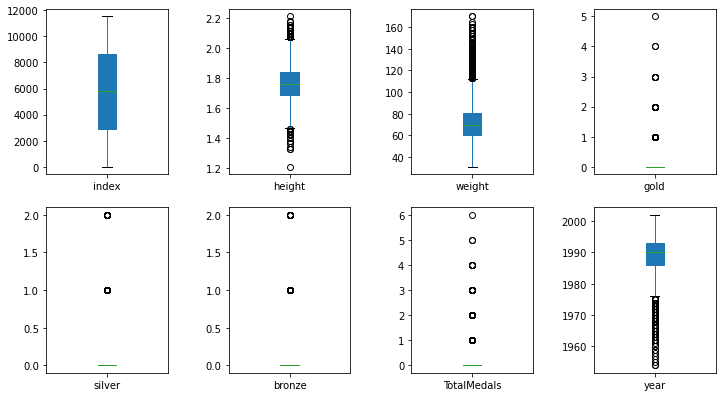

In [44]:
df_to_plot = Sport_df.drop(columns=['id','sex'])
df_to_plot = df_to_plot.select_dtypes(include=np.number)
#subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

### 2. קוראלציות

### 2.1 נסתכל על הדאטה כדי להבין איך הוא נראה

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272001E9AF0>,
      dtype=object)

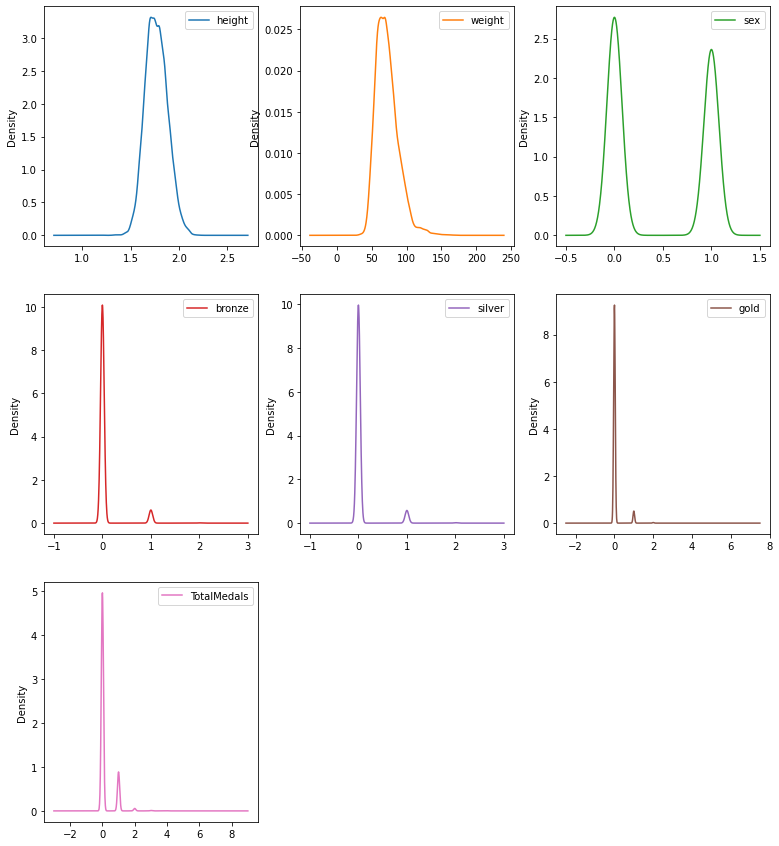

In [45]:
features = ['height','weight','sex','bronze','silver','gold','TotalMedals']
Sport_df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(13,15))

### 2.2 נחפש קורלאציות באמצעות heatmap

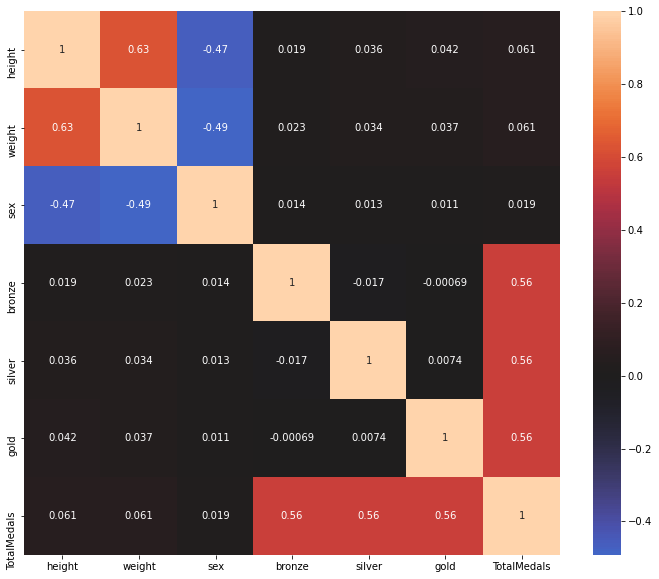

In [46]:
corrs = Sport_df[features].corr(method = 'kendall')

plt.figure(figsize=(12,10))  #figure size
sns.heatmap(corrs, center=0, annot = True )


### 3.0 דפוסים באולימפידה

### הראנו את חמשת המדינות שזכו בהכי הרבה מדליות 3.1

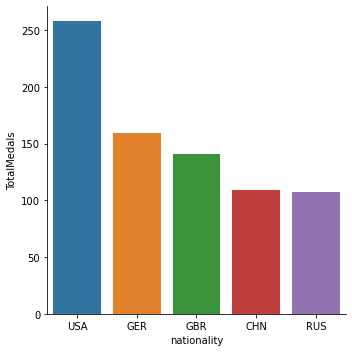

In [47]:
max_data = Sport_df.groupby('nationality')[['TotalMedals']].sum()

max_data1 = max_data.sort_values('TotalMedals',ascending=False).head(5)

max_data
max_catplot = max_data1.reset_index()

sns.catplot(x="nationality", y="TotalMedals", kind="bar", data=max_catplot)

### 3.2 החלטנו לתת מבט מקרוב לארצות הברית

In [48]:
Sport_df2=data.copy()
Sport_df2["TotalMedals"] = Sport_df2["gold"]+Sport_df2["silver"]+Sport_df2["bronze"]
usa_data = Sport_df2[Sport_df2["nationality"]=="USA"]
usa_data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,TotalMedals
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0,2
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0,0
104,259002430,Adeline Maria Gray,USA,female,1/15/91,1.73,77.0,wrestling,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11242,567715213,Yijun Feng,USA,male,2/12/97,1.86,71.0,table tennis,0,0,0,0
11339,920857282,Yue Wu,USA,female,1/4/90,1.61,50.0,table tennis,0,0,0,0
11436,306067063,Zach Garrett,USA,male,4/8/95,1.78,63.0,archery,0,1,0,1
11437,995684067,Zach Ziemek,USA,male,2/23/93,1.94,88.0,athletics,0,0,0,0


### 3.3 ננסה לראות את ההבדל בזוכים לפי מגדר בארצות ביחס לשאר העולם

In [49]:
sum_data = usa_data.groupby('sex')[['TotalMedals']].sum()

sum_data1 = sum_data.sort_values('TotalMedals',ascending=False).head(5)

max_gender = sum_data1.reset_index()
max_gender



,sex,TotalMedals
0,female,149
1,male,115


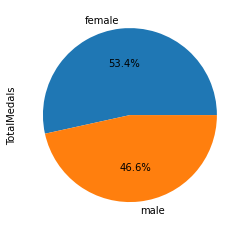

In [50]:
usa_data.groupby('sex')['TotalMedals'].count().plot.pie(autopct='%1.1f%%')

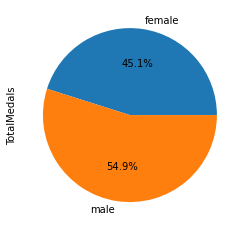

In [51]:
Sport_df2.groupby('sex')['TotalMedals'].count().plot.pie(autopct='%1.1f%%')

>הבחנה מספר 1 : ניתן לראות שלמרות שברוב העולם היחס בין הזוכים הוא לטובת הגברים ארצות הברית שהיא הזוכה הגדולה ביותר מבחינה כמותית באולימפידה קיים יחס חיובי לטובת הנשים דבר זה יכול לעודד שילוב של נשים במדינות אחרות

### 3.חילוק לפי ענפי ספורט

In [72]:
sport_all = Sport_df.groupby("sport")[["TotalMedals",'gold','silver','bronze']].sum().reset_index()
sport_max=sport_all.sort_values('TotalMedals',ascending=False).head(10)
sport_max

,sport,TotalMedals,gold,silver,bronze
0,aquatics,335,119,110,106
2,athletics,183,64,61,58
16,rowing,140,48,48,44
13,hockey,99,34,32,33
9,football,90,36,36,18
11,gymnastics,90,30,30,30
6,cycling,83,27,27,29
24,volleyball,83,28,27,28
5,canoe,82,27,27,28
12,handball,74,29,30,15


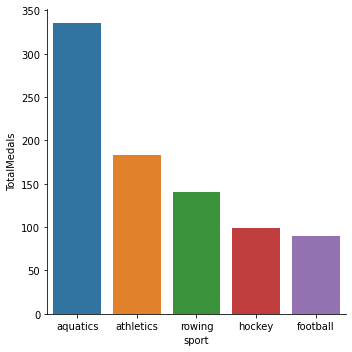

In [74]:
sns.catplot(x="sport", y="TotalMedals", kind="bar", data=sport_max.head(5))

In [53]:
Sport_df['sport'].value_counts()

athletics            2187
aquatics             1396
football              583
rowing                535
cycling               502
hockey                432
volleyball            382
shooting              380
judo                  377
sailing               372
handball              349
wrestling             349
canoe                 327
gymnastics            319
rugby sevens          296
basketball            284
weightlifting         258
fencing               245
equestrian            215
tennis                191
table tennis          168
badminton             164
archery               126
taekwondo             125
golf                  115
triathlon             109
modern pentathlon      72
Name: sport, dtype: int64

In [55]:
aquatics_df = Sport_df[Sport_df["sport"]=="aquatics"]
aquatics_df

,index,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,TotalMedals,year
7,7,382571888,Aaron Younger,AUS,0,1991-09-25,1.93,100.0,aquatics,0,0,0,0,1991
13,14,162792594,Abbey Weitzeil,USA,1,1996-12-03,1.78,68.0,aquatics,1,1,0,2,1996
25,26,189931373,Abdelaziz Mohamed Ahmed,SUD,0,1994-10-12,1.81,72.0,aquatics,0,0,0,0,1994
41,45,702606719,Abdoul Khadre Mbaye Niane,SEN,0,1988-08-20,1.90,90.0,aquatics,0,0,0,0,1988
52,64,884912136,Abigail Johnston,USA,1,1989-11-16,1.66,61.0,aquatics,0,0,0,0,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,11500,274387882,Ziv Kalontarov,ISR,0,1997-01-15,1.85,71.0,aquatics,0,0,0,0,1997
10826,11503,593183472,Zivko Gocic,SRB,0,1982-08-22,1.93,93.0,aquatics,1,0,0,1,1982
10830,11507,446963221,Zoe Arancini,AUS,1,1991-07-14,1.70,70.0,aquatics,0,0,0,0,1991
10835,11512,371106012,Zohar Shikler,ISR,1,1997-07-08,1.78,61.0,aquatics,0,0,0,0,1997


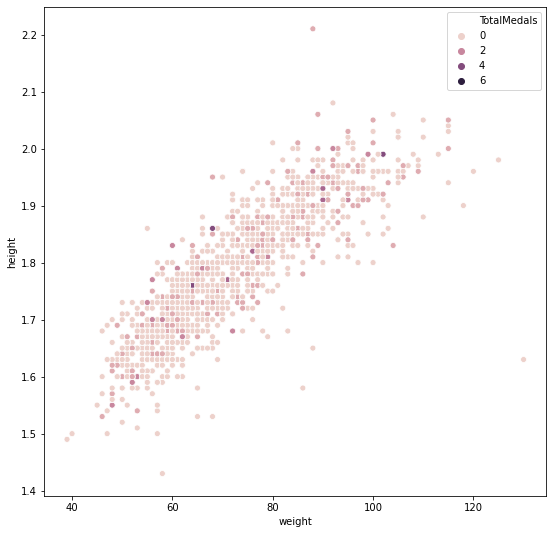

In [56]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=aquatics_df, x="weight", y="height",hue="TotalMedals", color = 'coral')
plt.show()

In [59]:
ath = aquatics_df.groupby("TotalMedals")["height","weight"].mean()
ath.reset_index()

<ipython-input-59-48071ea1d21b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ath = aquatics_df.groupby("TotalMedals")["height","weight"].mean()


,TotalMedals,height,weight
0,0,1.784346,71.892011
1,1,1.806847,74.733990
2,2,1.789268,69.560976
3,3,1.858000,79.000000
4,4,1.823333,72.333333
5,5,1.830000,72.000000
6,6,1.940000,90.000000


### הבחנה 3 - הראנו בתרשים שהפיזור הוא די רחב בגובה ומשקל ואין מקום ספציפי אליו הדאטה מתקבצת , לאחר מכן הראנו בטבלה את אחוזי הגובה והמשקל לפי מספר מדליות וראינו שאין כל כך שינוי . לכן מכאן אנו מבינים שכדי לזכות במדליה לא צריך גובה או משקל שונה בצורה קיצונית אלא להיות עם הגובה/משקל ממוצע לסוג ספורט וגנטיקה טובה עיקר ההשפעה תלויה במוטיבציה של הספורטאי

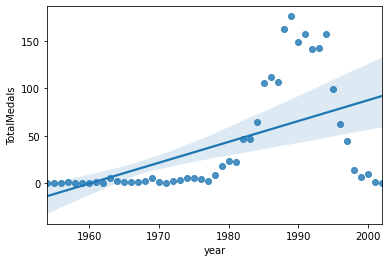

In [60]:
year_data = Sport_df.groupby('year')[['TotalMedals']].sum()
year_data1=year_data.sort_values('TotalMedals',ascending=False).reset_index()
sns.regplot(x='year', y='TotalMedals', data=year_data1)

הבחנה:בהחלה חשבנו שכאשר גיל המתמודד יהיה יותר צעיר כך סיכוייו לצליח לזכות במדליה יהיו גבוהים יותר או לחלופין כאשר גיל המתמודד גבוה יותר כך הנסיון שהוא צובר נותן לו סיכויים גבוהים יותר לזכות במדליה. אבל דווקא מהניתוח כאן,ניתן לראות שבגיל 27 שזה בדיוק באמצע, מספר המדליות הוא הגבוה ביותר.
כשגם הוא יחסית לא מבוגר לספורטאי וגם צבר מספיק ניסיון כדי להצליח לזכות במדליה.